In [109]:
#--Vector models
#We have an issue (ML repreenests by numbers and language represenets by text)
#Convert language to numerical format
#--Main definations
#Text preprocessing
#Count vectors
#TFIDF
#Word embedding
#Sentence : sequence of words that starts with capitalize letter and ends with punctuation (period or quesiton mark) (? , .)
#Token : can be words or sub units of words or even punctuation
#We use term token rather than word
#Letters and charcters
#Punctuations are considered as charcters
#NLP can be sometimes build on term of charcters
#Vocabulary : the set of all words
#Corpus : a large collection of writings of a specific kind or specific subject
#collection of writings or recorded marks used for linguistic analysis
#N-grams : unigram , bigrams , trigrams ---> we use it in word2vec and markov
#--What is the vector ?
#Vectors are how will represent text numerically , they are also foundatation of any ML techniques
#Vectors are raw material of ML and data analysis
#Mathematically vectors are quantity that has both magnitude and direction
#vector is useful in contex with high diminsions
#Vector is an array of scalers
#Cartesian vs Polar coordinates
#Both requires the same scaler component
#Each component represents orthogonal axes 
#Don't think components as angels , think it as numbers
#Why vectors are useful ?
#Traditional programming vs ML
#Vectors can make ML easy to apply rather than traditional programming so we have to vectorize text into numbers so ML can be applied (data driven automated decision making)
#Examples : spam detection , organizing documents (clustering)
#We want useful mapping and good fit line depends on verctors so vectors can be useful too
#--Bags Of Words (bow)
#It is NLP approach that doesnot consider the word ordering in the sentence
#Order matters in the meaning of the word rather than losing information
#Most vector models and classical machine learning models use bag of words
#Probalistic models and DL donot use it
#--Count Vecotrizer
#It is bow method and simply called "counting"
#Simple task : we want simple classification of biology and physics documents
#What is document ? it is generic word and can be anything file or paper or even sentence depends on the contex of our task
#Inputs vs Target , Independent vs dependent , predicators vs target , features vs target whatever ...
#Let's consider vocabulary is unique words in our training corpus we can call it V
#Each document converted into vector of size V ---> the vector components containt count of each word in V
#There is no special order of the words inside each vector
#To classify between docments types we do it based on vocabulary and each document hes more words related to which class
#Practical issues : tokenization , how do we know which word corresponds to which position in our vector as long as the words are unordered ---> we need some kind of mapping 
#Remeber x_train is related to .fit_transform and x_test is related to .transform 
#Why scipy matrices instead of numpy matrices ? scipy contains sparse matrices , documents will be N and vocabulary will be V so the size cout data matrix is N x V (it is based on the concept of count vectorizer) , store non zero elements only so saving memory
#Scipy sparse matrices speacial purpose to those documents which have number of zeros 
#Most of documents donot contain most of words
#Vactor normalization : in our corpus may be we have long documents and short ones so we have to make them close
#Long document means large count of words
#We have 2 methods first is L2-norm 1 , second divide by sum
#The first one is x/||x|| where ||x|| is  sqrt of each element sqaure of the all elements are the vocab means sqrt the the square of vector 
#The second one is x/all elements are the vocab means  the square of vector
#The second one is not exactly the probabilty but more like rate of appearance in document or the probability of drawing the word if you picked random word from the document
#we call the second one L1-norm 1 because it is the sqrt of L2-norm 1 (remeber regularization)
#X is the word that supposed to be normalized
#Sum of all elements are one in ||x|| it is like the total number of sample space in probability
#TFIDF use normalization but count vercots are not
#--Tokanization
#Splitiing strings into words
#.split()
#You can do it by your self or by scikit-learn (Count verctorizer)
#Punctuation is very important like difference between period and question mark (pros)
#So depends on contex we can tokenize punctuation
#Count Vectorizer ignore punctuation
#To differentiate between period at the end and question mark at the end we need sufficient number of sentences so model can be trained enough on the contex
#Punctuation increses diminsionality (cons)
#Casing is important to make our model is case insensitive so we need to lower case upper cases string.lower_case() [CountVectorizer(lowercase=True)]
#We need this kind of casing so our vocab doesnot get bigger and avoid high diminsionality
#Accents We need this kind of casing so our vocab doesn't get bigger and avoid high diminsionality because words letters can be different but give the same meaning  [CountVectorizer(strip_accents=True)]
#We can build charcter based model as well because vocab will be small (26 letters + punctuation)
#The cons of using word based model is the high diminsionality of the large vocab (up to 1 million) so we need one million vector size and this is too much space complexity
#This will corresponse to very large weight matrix
#The pros that word contains lots of information unlike character based model
#So we have two approches [word or char] both has pros and cons
#There is third model (subword) it is between charcater based and word based
#Subwords is useful about DL and Transformers
#In subwords there is difference between "walking" and "walk" if we didnot split walking to walk + ing 
#We can only hope that model knows the difference between these 2 words through training
#We need to do the same with walks walked etc... or we should connect them via shared representation
#For both word based or charcater based , just change analyzer argument [CountVectorizer(analyzer="word")] or [CountVectorizer(analyzer="char")]
#To create tokenization by your self for charc : for loop is better than .split()
#There is 2 libararies specified at this kind of work (ntlk,nltk.tokenize.toktok)
#To do tokenization we donot require ML just split string or use similar libraries for this
#Exceptions in languages of tokens is the opposite of pattern in ML
#--Stop words
#It is very useful in grammatical context but it is not useful and donot have any inforamtion we need so we have to remove it in order to less redunanty and diminsionality
#More diminsions means more diminsions , space and time 
#There is also distance consideration : means that we can't differentiate between documents if stopwords still exist also our understanding to feature vectors involve distance between each other
#Documents will be more close to each other (similar) and this can harmful over shadowing the other counts of the important words
#CountVecotrizer(stop_words="english" or "none" or predefined_list for special stopwords)
#There are also manual way we can do it through nltk converting string to list and remove stop words from it
#--Stemming and lemmatization
#reduce diminsionality and covert every word to its root
#also reduce dissimialarity between the related words
#NLP os useful of SEO tracking
#Preprocessing step
#Difference between stemming and leammtization
#Stemming is very crude as stemming just chops off the end of the word , the result not necessarily the same word
#Lemmatization is more sophisticated as it uses the real rules of the language , the true root must be returend
#We call root "Lemma"
#By applying this we reduce diminsionality so computing and space complexity will be reduced
#Stemming is based on heuristic 
#There is multiple methods of stemming
#Lemmatization is lookup table / table of ruels / dictionary / database of knowledge whatever ...
#Be careful of leammatization of pos in your code (verbs etc...) (any thing except noun)
#POS
#It consists of (noun , verb , pronoun , adjective , adverb , article , preposition , conjunction , interjunction) know the difference in the below image
#The state of dictionary sometimes has different with state of nltk
#Remeber that lemmatizer wordnet done by nltk canot be compitable with pos tagging they are using pos differnet tages
#The solution is limitized function map tag from one fomat to another
#Apps of stem and lemma
#DL is just lazy and bad approach and it is the replacement way of stem and lemm
#Chatgpt , spam detection and sentiment analysis are not the only apps of NLP
#SEO/document retrieval , social media tags , online ads
#SEO not only retreive results based on word but applying NLP and convert word to its root can enhance search getting more related results
#May queries change but the intent of the user is the same (we want things more easier to the user) make time complexity lower so users can be frustrated
#Online ads is based on keywords (relevant terms user can add in search box)
#Match your ads to search terms 
#Some times stemming helps us to remian distinct word as unneccessary not the same as neccesary
#Stemming depends on pronouncution unlike Lemmatization depends on knowledge
#Simple tokenization is s.split() , it is the simplest possible tokenizers
#--Vector similarity
#

![Sample Image](image.png)


In [110]:
#Scipy exercise
import numpy as np
#We use .sparse to acces the sparse matrices
from scipy.sparse import csr_matrix
#Create dense matrix for testing using numpy
#Remeber matrix is list of lists
dense_matrix = np.array([
[0,1,1],
[2,1,0],
[0,0,3]
])
#Convert dense matrix to csr matrix
sparse_matrix = csr_matrix(dense_matrix)
print(sparse_matrix)

  (0, 1)	1
  (0, 2)	1
  (1, 0)	2
  (1, 1)	1
  (2, 2)	3


In [111]:
#Exercise on counting number of words in string without using tokenization libraries (manual)
#Using delimeter of space
statement=input("Enter sentence : ")
#split the statement into tokenz by space delimeter "" or " " --> it already generates list no need to add new list
words=statement.split()
#Count lenght of words
print("The number of words is : ",len(words))

The number of words is :  10


In [112]:
#Exercis on tokenization
#desired library
#nltk is more accurate as it counts the punctuaion stucked with words rather than ToktokTokenizer and for text blob it ignores the punctuations
#nltk
import nltk
from textblob import TextBlob
#download the tokenizers package
#only need to do once
nltk.download('punkt')
#our data
data="Hi i am Omar. I am very happy to start with this course."
#extract sentences (lines) tokens ---> our delimetre is '.'
tokens=nltk.sent_tokenize(data)
print(tokens)
#extract word tokens
tokens=nltk.word_tokenize(data)
print(tokens)
#check count of word
#we canot use it because tokens here is the list so we will use lenght instead
print("Your number of words are : ",len(tokens))
#desired libarary
#toktoktokenizer
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer=ToktokTokenizer()
tokens=tokenizer.tokenize(data)
print(tokens)
print("Your number of words are : ",len(tokens))
#desired library
#text blob
blob=TextBlob(data)
tokens=blob.words
print(tokens)
print("Your number of words are : ",len(tokens))

['Hi i am Omar.', 'I am very happy to start with this course.']
['Hi', 'i', 'am', 'Omar', '.', 'I', 'am', 'very', 'happy', 'to', 'start', 'with', 'this', 'course', '.']
Your number of words are :  15
['Hi', 'i', 'am', 'Omar.', 'I', 'am', 'very', 'happy', 'to', 'start', 'with', 'this', 'course', '.']
Your number of words are :  14
['Hi', 'i', 'am', 'Omar', 'I', 'am', 'very', 'happy', 'to', 'start', 'with', 'this', 'course']
Your number of words are :  13


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [113]:
#Exercise on removing stopwords with ntlk
statement=input("Enter sentence : ")
#desired libararies
import nltk 
#first desired module
from nltk.corpus import stopwords
#download the stopwords package in your desired language
#not all langauges exists
nltk.download('stopwords')
stopwords = stopwords.words('english')
print('Stop words in English : ',stopwords)
#second tokens
import nltk
nltk.download('punkt')
#remeber tokens work with order 
#extract word tokens
tokens=nltk.word_tokenize(statement)
print('Tokens before : ',tokens)
#loop on tokens to find out the stopwords and remove them
stop_list=[]
for i in tokens :
    if i in stopwords:
        stop_list.append(i)
        tokens.remove(i)
print('Tokens after : ',tokens)
#convert list to string again so we can move forward
statement = ' '.join(tokens)
print('Sentence : ',statement)    
print('List of stop words : ',stop_list)            

Stop words in English :  ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own'

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [114]:
#Exercise on removing stopwords with ToktokTokenizer
statement=input("Enter sentence : ")
#desired libararies
import nltk 
#first desired module
from nltk.corpus import stopwords
#download the stopwords package in your desired language
#not all langauges exists
nltk.download('stopwords')
stopwords = stopwords.words('english')
print(stopwords)
#second tokens
from nltk.tokenize.toktok import ToktokTokenizer
#create toktoktokenizer object
tokenizer=ToktokTokenizer()
#remeber tokens work with order and the difference between nltk and the other library only the consideration of the punctuation
#extract word tokens
tokens=tokenizer.tokenize(statement)
print('Tokens before : ',tokens)
#loop on tokens to find out the stopwords and remove them
stop_list=[]
for i in tokens :
    if i in stopwords:
        stop_list.append(i)
        tokens.remove(i)
print('Tokens after : ',tokens)
#convert list to string again so we can move forward
statement = ' '.join(tokens)
print('Sentence : ',statement)    
print('List of stop words : ',stop_list)            

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [115]:
#Exercise on removing stopwords with textblob
statement=input("Enter sentence : ")
#desired libararies
import nltk 
#first desired module
from nltk.corpus import stopwords
#download the stopwords package in your desired language
#not all langauges exists
nltk.download('stopwords')
stopwords = stopwords.words('english')
print(stopwords)
#second tokens
from textblob import TextBlob
#create textblob object
blob=TextBlob(statement)
#remeber tokens work with order and the difference between nltk and the other library only the consideration of the punctuation
#extract word tokens
tokens=blob.words
print('Tokens before : ',tokens)
#loop on tokens to find out the stopwords and remove them
stop_list=[]
for i in tokens :
    if i in stopwords:
        stop_list.append(i)
        tokens.remove(i)
print('Tokens after : ',tokens)
#convert list to string again so we can move forward
statement = ' '.join(tokens)
print('Sentence : ',statement)    
print('List of stop words : ',stop_list)            

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [116]:
#Exercise on stemming 
#desired library
#import stemming class from ntlk
from nltk.stem import PorterStemmer
#create stemmer object (instance)
ps = PorterStemmer()
#list of words need to be stemmed
words=['play','plays','dogs','children','better','was']
#remeber that stemmer can fail to get the actual root of the word
#stemming is very crude as stemming just chops off the end of the word , the result not necessarily the same word
for i in words :
  print (i , " : ",ps.stem(i))

play  :  play
plays  :  play
dogs  :  dog
children  :  children
better  :  better
was  :  wa


In [117]:
#Exercise on lemmatization
#desired library
#import lemmatization class from ntlk
from nltk.stem import WordNetLemmatizer
#download the knowlegde databse for lemmatization
#only need to do once
#don't forget to import wordnet module
from nltk.corpus import wordnet
nltk.download('wordnet')
#create lemmatizer object (instance)
lemm = WordNetLemmatizer()
#list of words need to be stemmed
words=['play','plays','dogs','children','better','was']
#remeber that lemmatizer can  get the actual root of the word
#Lemmatization is more sophisticated as it uses the real rules of the language , the true root must be returend
for i in words :
  print (i , " : ",lemm.lemmatize(i))
#we can add more argument to lemmatize called pos (part of speech) to get the true root of words with verbs  etc... (any thing except noun)
#for verbs we can wordnet.VERB
print('going : ',lemm.lemmatize('going',pos=wordnet.VERB))
#going can be noun but when the root is go it canot be noun anymore we can control this by pos argument we havenot to write it so it can return as noun
print('going : ',lemm.lemmatize('going'))
#this words is considered as noun in ntlk
#if you get wring answers in lemmatization the probelm is you didnot specify the pos of the word correctly and it is treated by default as name 
print('the correct better : ',lemm.lemmatize('better',pos=wordnet.ADV))
print('was : ',lemm.lemmatize('was',pos=wordnet.VERB))

#To make it automatically we need some kind of mapping function to decode pos tagging into pos argument wordnet 
#first know the tagging
print()
corrected=['better','was']

#with nltk
pos_tags=[]
for token in corrected :
  #nltk pos tags input must be list or string
  pos_tags.append((nltk.pos_tag([token])[0][0],nltk.pos_tag([token])[0][1]))
print('Corrected tags in ntlk : ',pos_tags)

#with text blob
#first convert list into string
pos_tags_blob=[]
for token in corrected :
  pos_tags_blob.append((TextBlob(token).tags[0][0],TextBlob(token).tags[0][1]))
print('Corrected tags in text blob : ',pos_tags_blob)

#second apply mapping function
pos_map = {
    'NN': wordnet.NOUN,
    'VB': wordnet.VERB,
    'JJ': wordnet.ADJ,
    'RB': wordnet.ADV,
    'DT': wordnet.NOUN
}
def convert_pos_tag(pos_tag):
    #we decode depends on the first two letters
    #we use .get because it is dictionary
    #wordnet.NOUN is just in exceot case we donot find any case
    return pos_map.get(pos_tag[:2],wordnet.NOUN)

print()
    
#loop and get the pos decoding
#in ntlk pos
print('Lemmatize after nltk pos : ')
print()
for tup in pos_tags :
  print(f'{tup[0]} : ',lemm.lemmatize(f'{tup[0]}',pos=convert_pos_tag(tup[1])))

print('-'*100)

#in textblob pos
print()
print('Lemmatize after textblob pos : ')
print()
for tup in pos_tags_blob : 
  print(f'{tup[0]} : ',lemm.lemmatize(f'{tup[0]}',pos=convert_pos_tag(tup[1])))

#the context make pos different , donot pass list of words to any pos wether it is nltk or text blob because first it sees it as sentence and as we know the first word of the sentece calssified as NN (noun)

play  :  play
plays  :  play
dogs  :  dog
children  :  child
better  :  better
was  :  wa
going :  go
going :  going
the correct better :  well
was :  be

Corrected tags in ntlk :  [('better', 'RBR'), ('was', 'VBD')]
Corrected tags in text blob :  [('better', 'RBR'), ('was', 'VBD')]

Lemmatize after nltk pos : 

better :  well
was :  be
----------------------------------------------------------------------------------------------------

Lemmatize after textblob pos : 

better :  well
was :  be


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [118]:
#Exrecise on POS tagging with ntlk
#first make tokenization so we can define pos for each token
#we can choose between nltk or totoktokenizer or textblob 
#desired library
#nltk is more accurate as it counts the punctuaion stucked with words rather than ToktokTokenizer and for text blob it ignores the punctuations
#nltk
import nltk
#our data
data="Hi i am Omar. I am very happy to start with this course."
#extract word tokens
tokens=nltk.word_tokenize(data)
print('Tokens : ',tokens)
#second we do pos tagging
pos_tags = nltk.pos_tag(tokens)
print('Tags : ',pos_tags)
#it is useful when we are searching on special tag
#we want to remove NN and update tags
#noted that tags is list of tuples so i have to create the same structure for the new structure
#remember when i choose NN for example to be removed it selects the sub tags of NN also like VBP
pos_tags_update=[]
for tup in pos_tags :
  if 'VBP' not in tup[1]:
    pos_tags_update.append(tup)
print('Updated tags of each word :\n',pos_tags_update)
#convert this list of tuples to string again
#join ' ' for letters because you make spaces in joined word and join '' for words
string=""
for tup in pos_tags_update:
  #zero case when string is empty we donot need previous white space
  if string == "" :
    #tup[0] is the word and tup[1] is the tag
    string=string+''.join(tup[0])
  else :
    #we need old string and spaces between previous word then the new word
    string=string+' '+''.join(tup[0])
print('Updated string : \n',string)

Tokens :  ['Hi', 'i', 'am', 'Omar', '.', 'I', 'am', 'very', 'happy', 'to', 'start', 'with', 'this', 'course', '.']
Tags :  [('Hi', 'NNP'), ('i', 'NN'), ('am', 'VBP'), ('Omar', 'NNP'), ('.', '.'), ('I', 'PRP'), ('am', 'VBP'), ('very', 'RB'), ('happy', 'JJ'), ('to', 'TO'), ('start', 'VB'), ('with', 'IN'), ('this', 'DT'), ('course', 'NN'), ('.', '.')]
Updated tags of each word :
 [('Hi', 'NNP'), ('i', 'NN'), ('Omar', 'NNP'), ('.', '.'), ('I', 'PRP'), ('very', 'RB'), ('happy', 'JJ'), ('to', 'TO'), ('start', 'VB'), ('with', 'IN'), ('this', 'DT'), ('course', 'NN'), ('.', '.')]
Updated string : 
 Hi i Omar . I very happy to start with this course .


In [119]:
#Exrecise on POS tagging with textblob
#the same concept and process the only difference is the libraries
#first make tokenization so we can define pos for each token
#we can choose between nltk or totoktokenizer or textblob 
#desired library
from textblob import TextBlob
#our data
data="Hi i am Omar. I am very happy to start with this course."
#extract word tokens
tokens=TextBlob(data)
print('Tokens : ',tokens)
#second we do pos tagging
pos_tags = tokens.tags
print('Tags : ',pos_tags)
#it is useful when we are searching on special tag
#we want to remove NN and update tags
#noted that tags is list of tuples so i have to create the same structure for the new structure
#remember when i choose NN for example to be removed it selects the sub tags of NN also like VBP
pos_tags_update=[]
for tup in pos_tags :
  if 'VBP' not in tup[1]:
    pos_tags_update.append(tup)
print('Updated tags of each word :\n',pos_tags_update)
#convert this list of tuples to string again
#join ' ' for letters because you make spaces in joined word and join '' for words
string=""
for tup in pos_tags_update:
  #zero case when string is empty we donot need previous white space
  if string == "" :
    #tup[0] is the word and tup[1] is the tag
    string=string+''.join(tup[0])
  else :
    #we need old string and spaces between previous word then the new word
    string=string+' '+''.join(tup[0])
print('Updated string : \n',string)

Tokens :  Hi i am Omar. I am very happy to start with this course.
Tags :  [('Hi', 'NNP'), ('i', 'NN'), ('am', 'VBP'), ('Omar', 'NNP'), ('I', 'PRP'), ('am', 'VBP'), ('very', 'RB'), ('happy', 'JJ'), ('to', 'TO'), ('start', 'VB'), ('with', 'IN'), ('this', 'DT'), ('course', 'NN')]
Updated tags of each word :
 [('Hi', 'NNP'), ('i', 'NN'), ('Omar', 'NNP'), ('I', 'PRP'), ('very', 'RB'), ('happy', 'JJ'), ('to', 'TO'), ('start', 'VB'), ('with', 'IN'), ('this', 'DT'), ('course', 'NN')]
Updated string : 
 Hi i Omar I very happy to start with this course


In [120]:
#Project 1 ---> Document classification through Count Vectorizer
#It is process of whole machine learning ---> we will use count vectorizer to feature extract the text encoding each document into numbers and then we wil perform prediction using naive bayes (multi nominal)
#desired libraries
#basic numerical computing libraries
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import nltk
#not necessary to download packages as we did it once before
#tokenization
from nltk import word_tokenize
#stemming and lemmatization
from nltk.stem import PorterStemmer,WordNetLemmatizer
#POS tagging
from nltk.corpus import wordnet
#download (POS) tagger based on the averaged perceptron algorithm package
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

**BBC Text Classification**

In [121]:
#import data
#better download it as csv from the lazy programmer website and import it locally
raw_data = pd.read_csv('bbc_text_cls.csv')
df = raw_data.copy()
df.sample(5)

,text,labels
1160,Tories unveil quango blitz plans\n\nPlans to a...,politics
44,US crude prices surge above $53\n\nUS crude pr...,business
1616,Double injury blow strikes Wales\n\nWales cent...,sport
714,Wife Swap makers sue US 'copycat'\n\nThe Briti...,entertainment
1803,Nadal puts Spain 2-0 up\n\nResult: Nadal 6-7 (...,sport


In [122]:
#cleansing
#investing
df.shape

(2225, 2)

In [123]:
df.describe().T

,count,unique,top,freq
text,2225,2127,Ray DVD beats box office takings\n\nOscar-nomi...,2
labels,2225,5,sport,511


In [124]:
df.dtypes

text      object
labels    object
dtype: object

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2225 non-null   object
 1   labels  2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [126]:
#check duplicates
df.duplicated().sum()

98

In [127]:
#remove duplicates
df.drop_duplicates(inplace=True)
#reset index
#we use drop = true so that we drop index column after reseting
df.reset_index(drop=True, inplace=True)

In [128]:
#investing agian
#.info() is more generalize
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2127 non-null   object
 1   labels  2127 non-null   object
dtypes: object(2)
memory usage: 33.4+ KB


In [129]:
#check missing value
#there is no missing value
df.isna().sum()

text      0
labels    0
dtype: int64

In [130]:
#check columns
#rename columns
df.columns=df.columns.str.lower().str.strip().str.replace(" ","_")
df.columns

Index(['text', 'labels'], dtype='object')

In [131]:
#check object features
#no object features exist
for i in  df.select_dtypes('object'):
    print(f'for {i} : \n',df[i].value_counts())
    print('-'*60)

for text : 
 text
Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n\nTime Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and

In [132]:
#inputs and lables
inputs = df['text']
labels = df['labels']

**EDA**

<Axes: >

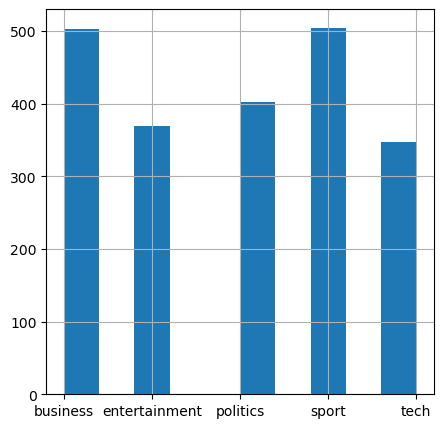

In [133]:
#little bit EDA
#apply histogram on labels which is our output and apply figure size
#matplotlib.pyplot as plt is the library
#we see if we have inbalanced classes at the same time
#checking imbalancing classes always befire splitting
labels.hist(figsize=(5,5))

**Train and Test Split**

In [134]:
#split data
#apply feature extraction of text after split not like classical machine learning 
#name it here inputs so we can name it later x train and x test with count vectorizer
#with count vectorizer we use inputs only as it is feature extraction adn encoding at the same time
inputs_train , inputs_test , y_train , y_test = train_test_split(inputs , labels , random_state=42)

In [135]:
inputs_train

394     Monsanto fined $1.5m for bribery\n\nThe US agr...
952     Tory backing for ID cards\n\nThe Tories are to...
39      Umbro profits lifted by Euro 2004\n\nUK sports...
462     IMF agrees fresh Turkey funding\n\nTurkey has ...
555     Horror film heads US box office\n\nA low-budge...
                              ...                        
1638    A November to remember\n\nLast Saturday, one n...
1095    Terror detainees win Lords appeal\n\nDetaining...
1130    Labour seeks to quell feud talk\n\nLabour's le...
1294    Chepkemei hit by big ban\n\nKenya's athletics ...
860     Jackson film 'absolute disaster'\n\nA PR exper...
Name: text, Length: 1595, dtype: object

In [136]:
inputs_test

282     EU 'too slow' on economic reforms\n\nMost EU c...
1999    BBC web search aids odd queries\n\nThe BBC's o...
1709    Serena becomes world number two\n\nSerena Will...
988     Boothroyd calls for Lords speaker\n\nBetty Boo...
2018    Fast lifts rise into record books\n\nTwo high-...
                              ...                        
746     Brit awards for Devon music acts\n\nDevon sing...
1717    What now for British tennis?\n\nTim Henman's d...
1782    Microsoft seeking spyware trojan\n\nMicrosoft ...
123     Bargain calls widen Softbank loss\n\nJapanese ...
1779    Roddick to face Saulnier in final\n\nAndy Rodd...
Name: text, Length: 532, dtype: object

In [137]:
y_train

394          business
952          politics
39           business
462          business
555     entertainment
            ...      
1638            sport
1095         politics
1130         politics
1294            sport
860     entertainment
Name: labels, Length: 1595, dtype: object

In [138]:
y_test

282          business
1999             tech
1709            sport
988          politics
2018             tech
            ...      
746     entertainment
1717            sport
1782             tech
123          business
1779            sport
Name: labels, Length: 532, dtype: object

**Bags of Words**

In [139]:
#apply count vectorizer
#create count vectorizer instance
#we will use all default values so no need to pass new arguments
vecotorizer = CountVectorizer()

In [140]:
#apply it on train set and test set
x_train = vecotorizer.fit_transform(inputs_train)
x_test = vecotorizer.transform(inputs_test)

In [141]:
#here we find our data stored at sparse matrices because most of this data is zeros means most of documents donot use most of words (scipy)
#the size of sparse matrix is number of documents (1595) x vocabulary size (26057)
#remeber the number of rows equals to number of documents and number of columns equals to size of vocabulary
#the number of the elements the sparse matrix = non zero elements
x_train

<1595x26057 sparse matrix of type '<class 'numpy.int64'>'
	with 322388 stored elements in Compressed Sparse Row format>

In [142]:
#the size of sparse matrix is number of documents (532) x vocabulary size (26057)
x_test

<532x26057 sparse matrix of type '<class 'numpy.int64'>'
	with 103448 stored elements in Compressed Sparse Row format>

In [143]:
#to access the number of the elements the sparse matrix = non zero elements (rows * columns) (we ise the != 0 condition)
(x_train != 0).sum()

322388

In [144]:
(x_test != 0).sum()

103448

In [145]:
#percentage of values of non zero for train data ---> non zero elements / total number of elements (rows * columns) we can access it in x_train.shape and dot product them np.prod 
per_non_zero = (x_train != 0).sum() / np.prod(x_train.shape) 
print('Percentage of non zero : ',per_non_zero * 100,' %') 

Percentage of non zero :  0.7756999575201845  %


**Modeling using Naivee Bayes**

In [146]:
#first case use model and see scores without using any preprocessing (remove stop words)
#create naive bayes object
model = MultinomialNB()
#train model on train data set
model.fit(x_train,y_train)
#measure score of the data set trained and tested assumed we have applied prediction using .predict
print('Train score : ',model.score(x_train,y_train) * 100,'%')
print('Test score : ',model.score(x_test,y_test) * 100,'%')
print('x_train size is : ',x_train)

Train score :  99.3103448275862 %
Test score :  96.80451127819549 %
x_train size is :    (0, 1)	3
  (0, 403)	1
  (0, 411)	1
  (0, 419)	1
  (0, 421)	2
  (0, 850)	1
  (0, 851)	1
  (0, 948)	2
  (0, 1108)	1
  (0, 1396)	2
  (0, 1506)	2
  (0, 1513)	1
  (0, 1514)	2
  (0, 1553)	1
  (0, 1556)	1
  (0, 1560)	1
  (0, 1605)	2
  (0, 1613)	1
  (0, 1728)	1
  (0, 1761)	1
  (0, 1769)	3
  (0, 1776)	1
  (0, 1986)	3
  (0, 2063)	1
  (0, 2115)	4
  :	:
  (1594, 24340)	1
  (1594, 24658)	2
  (1594, 24727)	1
  (1594, 24957)	1
  (1594, 25054)	1
  (1594, 25272)	7
  (1594, 25364)	1
  (1594, 25365)	1
  (1594, 25376)	1
  (1594, 25428)	1
  (1594, 25456)	1
  (1594, 25471)	1
  (1594, 25476)	2
  (1594, 25478)	1
  (1594, 25515)	3
  (1594, 25525)	1
  (1594, 25607)	1
  (1594, 25660)	6
  (1594, 25674)	1
  (1594, 25743)	1
  (1594, 25745)	1
  (1594, 25789)	2
  (1594, 25831)	1
  (1594, 25917)	1
  (1594, 25958)	1


In [147]:
#lets apply first varaition working with stop words removal
#we can remove it manually or with argument of count vectorizer
#try count verctorizer make the same steps but add argument of stop words
#apply count vectorizer
#create count vectorizer instance
vecotorizer = CountVectorizer(stop_words='english')
#apply it on train set and test set
x_train = vecotorizer.fit_transform(inputs_train)
x_test = vecotorizer.transform(inputs_test)
#secong case use model and see scores with removing stop words
#create naive bayes object
model = MultinomialNB()
#train model on train data set
model.fit(x_train,y_train)
#measure score of the data set trained and tested assumed we have applied prediction using .predict
print('Train score : ',model.score(x_train,y_train) * 100,'%')
print('Test score : ',model.score(x_test,y_test) * 100,'%')
print('x_train size is : ',x_train)
#we have noticed it accuracy score is increased after removing stopwords 

Train score :  99.37304075235109 %
Test score :  97.18045112781954 %
x_train size is :    (0, 15495)	10
  (0, 9468)	1
  (0, 948)	2
  (0, 3987)	1
  (0, 1769)	1
  (0, 10382)	1
  (0, 1762)	3
  (0, 17154)	2
  (0, 1108)	1
  (0, 1)	3
  (0, 9467)	1
  (0, 3989)	1
  (0, 12238)	2
  (0, 16411)	4
  (0, 1602)	2
  (0, 8394)	2
  (0, 16894)	1
  (0, 20763)	2
  (0, 25630)	2
  (0, 1754)	1
  (0, 3425)	1
  (0, 2789)	1
  (0, 8578)	2
  (0, 12016)	1
  (0, 22393)	1
  :	:
  (1594, 22260)	1
  (1594, 21501)	1
  (1594, 9141)	1
  (1594, 19257)	1
  (1594, 21481)	1
  (1594, 5124)	1
  (1594, 21024)	1
  (1594, 18760)	3
  (1594, 20324)	1
  (1594, 11463)	1
  (1594, 20882)	1
  (1594, 8971)	1
  (1594, 2187)	1
  (1594, 15448)	1
  (1594, 13391)	9
  (1594, 1459)	1
  (1594, 3088)	3
  (1594, 25245)	1
  (1594, 20465)	1
  (1594, 13823)	1
  (1594, 11789)	1
  (1594, 9870)	1
  (1594, 6114)	1
  (1594, 21533)	1
  (1594, 17666)	1


In [148]:
#lets apply first varaition working with stop words removal
#we can remove it manually or with argument of count vectorizer
#try it manually then apply count vectorizer by default we donot need any arguments because we have already done it 
#apply count vectorizer
#tokenization with nltk or any other library then compare it with stop words
#desired libararies
import nltk 
#desired module
from nltk.corpus import stopwords
#make stop words list globally not locally inside function
stopwords = stopwords.words('english')
def remove_stopwords(text , is_lower_case = False) :
  #tokenization
  #text maybe small or capital
  tokens=nltk.word_tokenize(text)
  #remove any white blank for every elemnt for list of words using list comprehensive
  tokens=[i.strip() for i in tokens]
  if is_lower_case :
    new_tokens = [i for i in  tokens if i not in stopwords]
  else :
    new_tokens = [i for i in tokens if i.lower() not in stopwords]
  #return filtered tokens converting list to string
  filtered_tokens=' '.join(new_tokens)
  return filtered_tokens

inputs_train = inputs_train.apply(remove_stopwords)
inputs_test = inputs_test.apply(remove_stopwords)
   
#create count vectorizer instance
vecotorizer = CountVectorizer()
#apply it on train set and test set
x_train = vecotorizer.fit_transform(inputs_train)
x_test = vecotorizer.transform(inputs_test)
#secong case use model and see scores with removing stop words
#create naive bayes object
model = MultinomialNB()
#train model on train data set
model.fit(x_train,y_train)
#measure score of the data set trained and tested assumed we have applied prediction using .predict
print('Train score : ',model.score(x_train,y_train) * 100,'%')
print('Test score : ',model.score(x_test,y_test) * 100,'%')
print('x_train size is : ',x_train)
#we have noticed it accuracy score is increased after removing stopwords 

Train score :  99.49843260188088 %
Test score :  97.36842105263158 %
x_train size is :    (0, 15608)	10
  (0, 9540)	1
  (0, 948)	2
  (0, 4029)	1
  (0, 24677)	3
  (0, 1774)	1
  (0, 10467)	1
  (0, 1767)	3
  (0, 17302)	2
  (0, 1108)	1
  (0, 1)	3
  (0, 9539)	1
  (0, 4031)	1
  (0, 12337)	2
  (0, 16546)	4
  (0, 1604)	2
  (0, 16624)	1
  (0, 8451)	2
  (0, 17041)	1
  (0, 20921)	2
  (0, 24174)	1
  (0, 25856)	2
  (0, 1759)	1
  (0, 3465)	1
  (0, 2814)	1
  :	:
  (1594, 22434)	1
  (1594, 21666)	1
  (1594, 9208)	1
  (1594, 19411)	1
  (1594, 21646)	1
  (1594, 5171)	1
  (1594, 21185)	1
  (1594, 18912)	3
  (1594, 20478)	1
  (1594, 11553)	1
  (1594, 21042)	1
  (1594, 9038)	1
  (1594, 2204)	1
  (1594, 15561)	1
  (1594, 13492)	9
  (1594, 1460)	1
  (1594, 3114)	3
  (1594, 25465)	1
  (1594, 20619)	1
  (1594, 13927)	1
  (1594, 11883)	1
  (1594, 9951)	1
  (1594, 6163)	1
  (1594, 21698)	1
  (1594, 17817)	1


In [149]:
#lets apply second varaition  working after lemmatization 
#to figure out POS tagging then converting it to wordnet pos tagging we can use nltk 
#remeber wordnet POS is different from nltk pos so we need to figure out nltk pos first and then decode it to wordnet to apply lemmatization properly
#desired library
#import lemmatization class from ntlk
from nltk.stem import WordNetLemmatizer
#don't forget to import wordnet module
from nltk.corpus import wordnet
#create lemmatizer object (instance)
lemm = WordNetLemmatizer()
#desired libararies
import nltk 
#desired module
from nltk.corpus import stopwords
#make stop words list globally not locally inside function
stopwords = stopwords.words('english')

def nltk_lemm(text,is_lower_case = False):
  
    #tokenization using nltk
    tokens=nltk.word_tokenize(text)
    #apply stop words removal
    #remove any white blank for every elemnt for list of words using list comprehensive
    tokens=[i.strip() for i in tokens]
    #text maybe small or capital
    if is_lower_case :
      new_tokens = [i for i in  tokens if i not in stopwords]
    else :
      new_tokens = [i for i in tokens if i.lower() not in stopwords]
    pos_tags=[]
    for token in new_tokens :
        #nltk pos tags input must be list or string
        pos_tags.append((nltk.pos_tag([token])[0][0],nltk.pos_tag([token])[0][1]))
        
    #second apply mapping function
    pos_map = {
        'NN': wordnet.NOUN,
        'VB': wordnet.VERB,
        'JJ': wordnet.ADJ,
        'RB': wordnet.ADV,
        'DT': wordnet.NOUN
    }
    
    def convert_pos_tag(pos_tag):
      #we decode depends on the first two letters
      #we use .get because it is dictionary
      #wordnet.NOUN is just exception case we donot find any case
      return pos_map.get(pos_tag[:2],wordnet.NOUN)
    
    nltk_lemma=[]
    for tup in pos_tags :
      nltk_lemma.append(lemm.lemmatize(f'{tup[0]}',pos=convert_pos_tag(tup[1])))
    #return filtered tokens converting list to string
    filtered_tokens=' '.join(nltk_lemma)
    return filtered_tokens


  
#loop and get the pos decoding
#in ntlk pos
print('Lemmatize after nltk pos : ')
print()
inputs_train = inputs_train.apply(nltk_lemm)
inputs_test = inputs_test.apply(nltk_lemm)
   
#create count vectorizer instance
vecotorizer = CountVectorizer()
#apply it on train set and test set
x_train = vecotorizer.fit_transform(inputs_train)
x_test = vecotorizer.transform(inputs_test)
#secong case use model and see scores with removing stop words
#create naive bayes object
model = MultinomialNB()
#train model on train data set
model.fit(x_train,y_train)
#measure score of the data set trained and tested assumed we have applied prediction using .predict
print('Train score : ',model.score(x_train,y_train) * 100,'%')
print('Test score : ',model.score(x_test,y_test) * 100,'%')
print('x_train size is : ',x_train)


Lemmatize after nltk pos : 

Train score :  99.37304075235109 %
Test score :  97.36842105263158 %
x_train size is :    (0, 13522)	10
  (0, 8151)	1
  (0, 939)	2
  (0, 3615)	1
  (0, 21022)	3
  (0, 1667)	1
  (0, 8954)	1
  (0, 1659)	3
  (0, 14998)	4
  (0, 1098)	1
  (0, 1)	3
  (0, 8171)	1
  (0, 3617)	1
  (0, 10602)	2
  (0, 14352)	6
  (0, 1524)	2
  (0, 14425)	1
  (0, 7281)	2
  (0, 14772)	1
  (0, 17902)	2
  (0, 20553)	1
  (0, 22053)	2
  (0, 1653)	1
  (0, 3124)	1
  (0, 2558)	1
  :	:
  (1594, 12770)	1
  (1594, 19282)	1
  (1594, 1417)	1
  (1594, 5484)	1
  (1594, 18517)	1
  (1594, 7885)	1
  (1594, 16679)	1
  (1594, 18502)	1
  (1594, 18126)	1
  (1594, 16291)	3
  (1594, 17539)	1
  (1594, 16167)	1
  (1594, 18000)	1
  (1594, 7750)	1
  (1594, 2046)	1
  (1594, 15449)	1
  (1594, 13478)	1
  (1594, 11635)	9
  (1594, 2822)	3
  (1594, 21706)	1
  (1594, 17660)	1
  (1594, 12020)	1
  (1594, 8501)	1
  (1594, 5388)	1
  (1594, 18542)	1


In [150]:
#lets apply second varaition  working after lemmatization 
#to figure out POS tagging then converting it to wordnet pos tagging we can use nltk 
#remeber wordnet POS is different from text blob pos so we need to figure out textblob pos first and then decode it to wordnet to apply lemmatization properly
#desired library
#import lemmatization class from ntlk
from nltk.stem import WordNetLemmatizer
#don't forget to import wordnet module
from nltk.corpus import wordnet
#create lemmatizer object (instance)
lemm = WordNetLemmatizer()
#desired libararies
import nltk 
from textblob import TextBlob
#desired module
from nltk.corpus import stopwords
#make stop words list globally not locally inside function
stopwords = stopwords.words('english')

def textblob_lemm(text,is_lower_case = False):
  
    #tokenization using textblob
    #create textblob object
    blob=TextBlob(text)
    #remeber tokens work with order and the difference between nltk and the other library only the consideration of the punctuation
    #extract word tokens
    tokens=blob.words    
    #apply stop words removal
    #remove any white blank for every elemnt for list of words using list comprehensive
    tokens=[i.strip() for i in tokens]
    #text maybe small or capital
    if is_lower_case :
      new_tokens = [i for i in  tokens if i not in stopwords]
    else :
      new_tokens = [i for i in tokens if i.lower() not in stopwords]
    pos_tags=[]
    for token in new_tokens :
        #nltk pos tags input must be list or string
        pos_tags.append((TextBlob(token).tags[0][0],TextBlob(token).tags[0][1]))
        
    #second apply mapping function
    pos_map = {
        'NN': wordnet.NOUN,
        'VB': wordnet.VERB,
        'JJ': wordnet.ADJ,
        'RB': wordnet.ADV,
        'DT': wordnet.NOUN
    }
    
    def convert_pos_tag(pos_tag):
      #we decode depends on the first two letters
      #we use .get because it is dictionary
      #wordnet.NOUN is just exception case we donot find any case
      return pos_map.get(pos_tag[:2],wordnet.NOUN)
    
    blob_lemma=[]
    for tup in pos_tags :
      blob_lemma.append(lemm.lemmatize(f'{tup[0]}',pos=convert_pos_tag(tup[1])))
    #return filtered tokens converting list to string
    filtered_tokens=' '.join(blob_lemma)
    return filtered_tokens


  
#loop and get the pos decoding
#in textblob pos
print('Lemmatize after textblob pos : ')
print()
inputs_train = inputs_train.apply(textblob_lemm)
inputs_test = inputs_test.apply(textblob_lemm)
   
#create count vectorizer instance
vecotorizer = CountVectorizer()
#apply it on train set and test set
x_train = vecotorizer.fit_transform(inputs_train)
x_test = vecotorizer.transform(inputs_test)
#secong case use model and see scores with removing stop words
#create naive bayes object
model = MultinomialNB()
#train model on train data set
model.fit(x_train,y_train)
#measure score of the data set trained and tested assumed we have applied prediction using .predict
print('Train score : ',model.score(x_train,y_train) * 100,'%')
print('Test score : ',model.score(x_test,y_test) * 100,'%')
print('x_train size is : ',x_train)


Lemmatize after textblob pos : 

Train score :  99.37304075235109 %
Test score :  97.36842105263158 %
x_train size is :    (0, 13508)	10
  (0, 8141)	1
  (0, 939)	2
  (0, 3614)	1
  (0, 20998)	3
  (0, 1667)	1
  (0, 8942)	1
  (0, 1659)	3
  (0, 14982)	4
  (0, 1098)	1
  (0, 1)	3
  (0, 8161)	1
  (0, 3616)	1
  (0, 10588)	2
  (0, 14336)	6
  (0, 1524)	2
  (0, 14409)	1
  (0, 7272)	2
  (0, 14756)	1
  (0, 17883)	2
  (0, 20529)	1
  (0, 22027)	2
  (0, 1653)	1
  (0, 3123)	1
  (0, 2557)	1
  :	:
  (1594, 12756)	1
  (1594, 19260)	1
  (1594, 1417)	1
  (1594, 5480)	1
  (1594, 18496)	1
  (1594, 7875)	1
  (1594, 16659)	1
  (1594, 18481)	1
  (1594, 18106)	1
  (1594, 16271)	3
  (1594, 17519)	1
  (1594, 16147)	1
  (1594, 17980)	1
  (1594, 7741)	1
  (1594, 2046)	1
  (1594, 15432)	1
  (1594, 13464)	1
  (1594, 11621)	9
  (1594, 2821)	3
  (1594, 21682)	1
  (1594, 17640)	1
  (1594, 12006)	1
  (1594, 8490)	1
  (1594, 5385)	1
  (1594, 18521)	1


In [151]:
#lets apply third varaition  working after lemmatization connected to count vecotrizer by calling object of the class in the argument of tokenizer and the return of the class must be list with nltk lemmatizer tokens only without removing stop words
#create lemmatization class
#decoding map
pos_map = {
        'NN': wordnet.NOUN,
        'VB': wordnet.VERB,
        'JJ': wordnet.ADJ,
        'RB': wordnet.ADV,
        'DT': wordnet.NOUN
    }

#we can use regular function or class
class lemmatizer():
    #initalization function , this function will work automatically when calling the class (the instance)
    def __init__(self):
        #self for protection purposes
        self.wnl=WordNetLemmatizer()
    #call function so when we call the class this function work  (the whole work)  
    #doc is document
    def __call__(self, doc) :
        #we donot have to type nltk.
        #tokenization
        tokens = word_tokenize(doc)
        #pos and lemmatization
        tags = nltk.pos_tag(tokens)
        return [self.wnl.lemmatize(word,pos=pos_map.get(pos_tag[:2],wordnet.NOUN)) for word , pos_tag in tags]
    
#create count vectorizer instance
vecotorizer = CountVectorizer(tokenizer=lemmatizer())
#apply it on train set and test set
x_train = vecotorizer.fit_transform(inputs_train)
x_test = vecotorizer.transform(inputs_test)
#secong case use model and see scores with removing stop words
#create naive bayes object
model = MultinomialNB()
#train model on train data set
model.fit(x_train,y_train)
#measure score of the data set trained and tested assumed we have applied prediction using .predict
print('Train score : ',model.score(x_train,y_train) * 100,'%')
print('Test score : ',model.score(x_test,y_test) * 100,'%')   
print('x_train size is : ',x_train)
#the time takes for doing operation is not related with scores 

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Train score :  99.37304075235109 %
Test score :  96.61654135338345 %
x_train size is :    (0, 14928)	10
  (0, 9404)	1
  (0, 480)	2
  (0, 4932)	1
  (0, 22263)	3
  (0, 2934)	1
  (0, 10261)	1
  (0, 2927)	3
  (0, 16597)	5
  (0, 24493)	1
  (0, 9421)	1
  (0, 4931)	7
  (0, 11938)	2
  (0, 15901)	6
  (0, 2800)	2
  (0, 15983)	1
  (0, 8510)	2
  (0, 19552)	2
  (0, 22219)	1
  (0, 23794)	2
  (0, 2921)	1
  (0, 4453)	1
  (0, 3880)	1
  (0, 8652)	2
  (0, 11745)	1
  :	:
  (1594, 2891)	1
  (1594, 6777)	1
  (1594, 14140)	1
  (1594, 20935)	1
  (1594, 2699)	1
  (1594, 6757)	1
  (1594, 18333)	1
  (1594, 9137)	1
  (1594, 20174)	1
  (1594, 19774)	1
  (1594, 17920)	3
  (1594, 19149)	1
  (1594, 19655)	1
  (1594, 9004)	1
  (1594, 3325)	1
  (1594, 17040)	1
  (1594, 14885)	1
  (1594, 6)	1
  (1594, 12960)	9
  (1594, 4151)	3
  (1594, 23446)	1
  (1594, 19269)	1
  (1594, 13350)	1
  (1594, 9790)	1
  (1594, 20213)	1


In [152]:
#lets apply fourth varaition  working after stemming connected to count vecotrizer by calling object of the class in the argument of tokenizer and the return of the class must be list with nltk tokenization only without removing stop words
#create stemming class
#creating classes is more easy than function


#we can use regular function or class
class stemmer():
    #initalization function , this function will work automatically when calling the class (the instance)
    def __init__(self):
        #self for protection purposes
        self.stm=PorterStemmer()
    #call function so when we call the class this function work  (the whole work)  
    #doc is document
    def __call__(self, doc) :
        #we donot have to type nltk.
        #tokenization
        tokens = word_tokenize(doc)
        #stemming
        return [self.stm.stem(token) for token in tokens]
    
#create count vectorizer instance
vecotorizer = CountVectorizer(tokenizer=stemmer())
#apply it on train set and test set
x_train = vecotorizer.fit_transform(inputs_train)
x_test = vecotorizer.transform(inputs_test)
#secong case use model and see scores with removing stop words
#create naive bayes object
model = MultinomialNB()
#train model on train data set
model.fit(x_train,y_train)
#measure score of the data set trained and tested assumed we have applied prediction using .predict
print('Train score : ',model.score(x_train,y_train) * 100,'%')
print('Test score : ',model.score(x_test,y_test) * 100,'%')   
print('x_train size is : ',x_train)
#the time takes for doing operation is not related with scores 
#as we see stemming is faster but less accurate

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Train score :  99.24764890282131 %
Test score :  96.42857142857143 %
x_train size is :    (0, 13321)	10
  (0, 8360)	1
  (0, 466)	2
  (0, 4584)	1
  (0, 20234)	3
  (0, 2807)	1
  (0, 9128)	1
  (0, 2802)	3
  (0, 14834)	4
  (0, 21904)	1
  (0, 8370)	1
  (0, 4583)	7
  (0, 10648)	2
  (0, 14196)	6
  (0, 2697)	2
  (0, 14274)	1
  (0, 7621)	2
  (0, 14629)	1
  (0, 17345)	2
  (0, 19777)	1
  (0, 21211)	2
  (0, 2796)	1
  (0, 4145)	1
  (0, 3619)	1
  (0, 7725)	2
  :	:
  (1594, 4898)	1
  (1594, 11231)	1
  (1594, 12580)	1
  (1594, 5951)	1
  (1594, 18500)	1
  (1594, 2771)	1
  (1594, 6156)	1
  (1594, 12603)	1
  (1594, 6136)	1
  (1594, 3161)	1
  (1594, 6)	1
  (1594, 8123)	1
  (1594, 17920)	1
  (1594, 17548)	1
  (1594, 15946)	3
  (1594, 16977)	1
  (1594, 8015)	1
  (1594, 15207)	1
  (1594, 11518)	9
  (1594, 3866)	3
  (1594, 20881)	1
  (1594, 17083)	1
  (1594, 11881)	1
  (1594, 8708)	1
  (1594, 17955)	1


In [153]:
#lets apply fifth varaition  working after  applying simple tokenization only , when we connect function to tokenizer argument in Count Vectorizer it is different than passing object of class we do it without prantheses
#create tokenization class
#creating classes is more easy than function


#we can use regular function or class
def simple_tokenizer(text):
    return text.split()
    
#create count vectorizer instance
vecotorizer = CountVectorizer(tokenizer=simple_tokenizer)
#apply it on train set and test set
x_train = vecotorizer.fit_transform(inputs_train)
x_test = vecotorizer.transform(inputs_test)
#secong case use model and see scores with removing stop words
#create naive bayes object
model = MultinomialNB()
#train model on train data set
model.fit(x_train,y_train)
#measure score of the data set trained and tested assumed we have applied prediction using .predict
print('Train score : ',model.score(x_train,y_train) * 100,'%')
print('Test score : ',model.score(x_test,y_test) * 100,'%')   
print('x_train size is : ',x_train)

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Train score :  99.37304075235109 %
Test score :  96.80451127819549 %
x_train size is :    (0, 15644)	10
  (0, 9855)	1
  (0, 480)	2
  (0, 5069)	1
  (0, 23949)	3
  (0, 2959)	1
  (0, 10754)	1
  (0, 2951)	3
  (0, 17382)	4
  (0, 25765)	1
  (0, 9873)	1
  (0, 5070)	1
  (0, 12527)	2
  (0, 16649)	6
  (0, 2815)	2
  (0, 16734)	1
  (0, 8905)	2
  (0, 17148)	1
  (0, 20555)	2
  (0, 23419)	1
  (0, 25062)	2
  (0, 2945)	1
  (0, 4558)	1
  (0, 3959)	1
  (0, 9055)	2
  :	:
  (1594, 22047)	1
  (1594, 2705)	1
  (1594, 7048)	1
  (1594, 21239)	1
  (1594, 9571)	1
  (1594, 19245)	1
  (1594, 21223)	1
  (1594, 20791)	1
  (1594, 18796)	3
  (1594, 20129)	1
  (1594, 18666)	1
  (1594, 20664)	1
  (1594, 9425)	1
  (1594, 3368)	1
  (1594, 17856)	1
  (1594, 15598)	1
  (1594, 6)	1
  (1594, 13593)	9
  (1594, 4243)	3
  (1594, 24691)	1
  (1594, 20253)	1
  (1594, 14003)	1
  (1594, 10264)	1
  (1594, 6943)	1
  (1594, 21266)	1


In [154]:
#after applying 8 phases the best is applying nltk tokenizer then stop words removal then nltk lemmatization , it is the best scores and the faster also but bigger size of x_train